In [1]:
#导入需要的包
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter
import datetime
%matplotlib inline

#导入数据
df_train_data=pd.read_csv('used_car_train_20200313.csv',sep=' ')
# df_test_data=pd.read_csv('used_car_testB_20200421.csv',sep=' ')
print(df_train_data.shape)
# print(df_test_data.shape)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
(150000, 31)


In [2]:
#数据备份
df_train=df_train_data.copy()
#查看总体数据
df_train.head(5)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [3]:
#查看训练集的变量数据类型
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [4]:
#查看唯一的字符串类型变量的数值分布
df_train['notRepairedDamage'].value_counts()

notRepairedDamage
0.0    111361
-       24324
1.0     14315
Name: count, dtype: int64

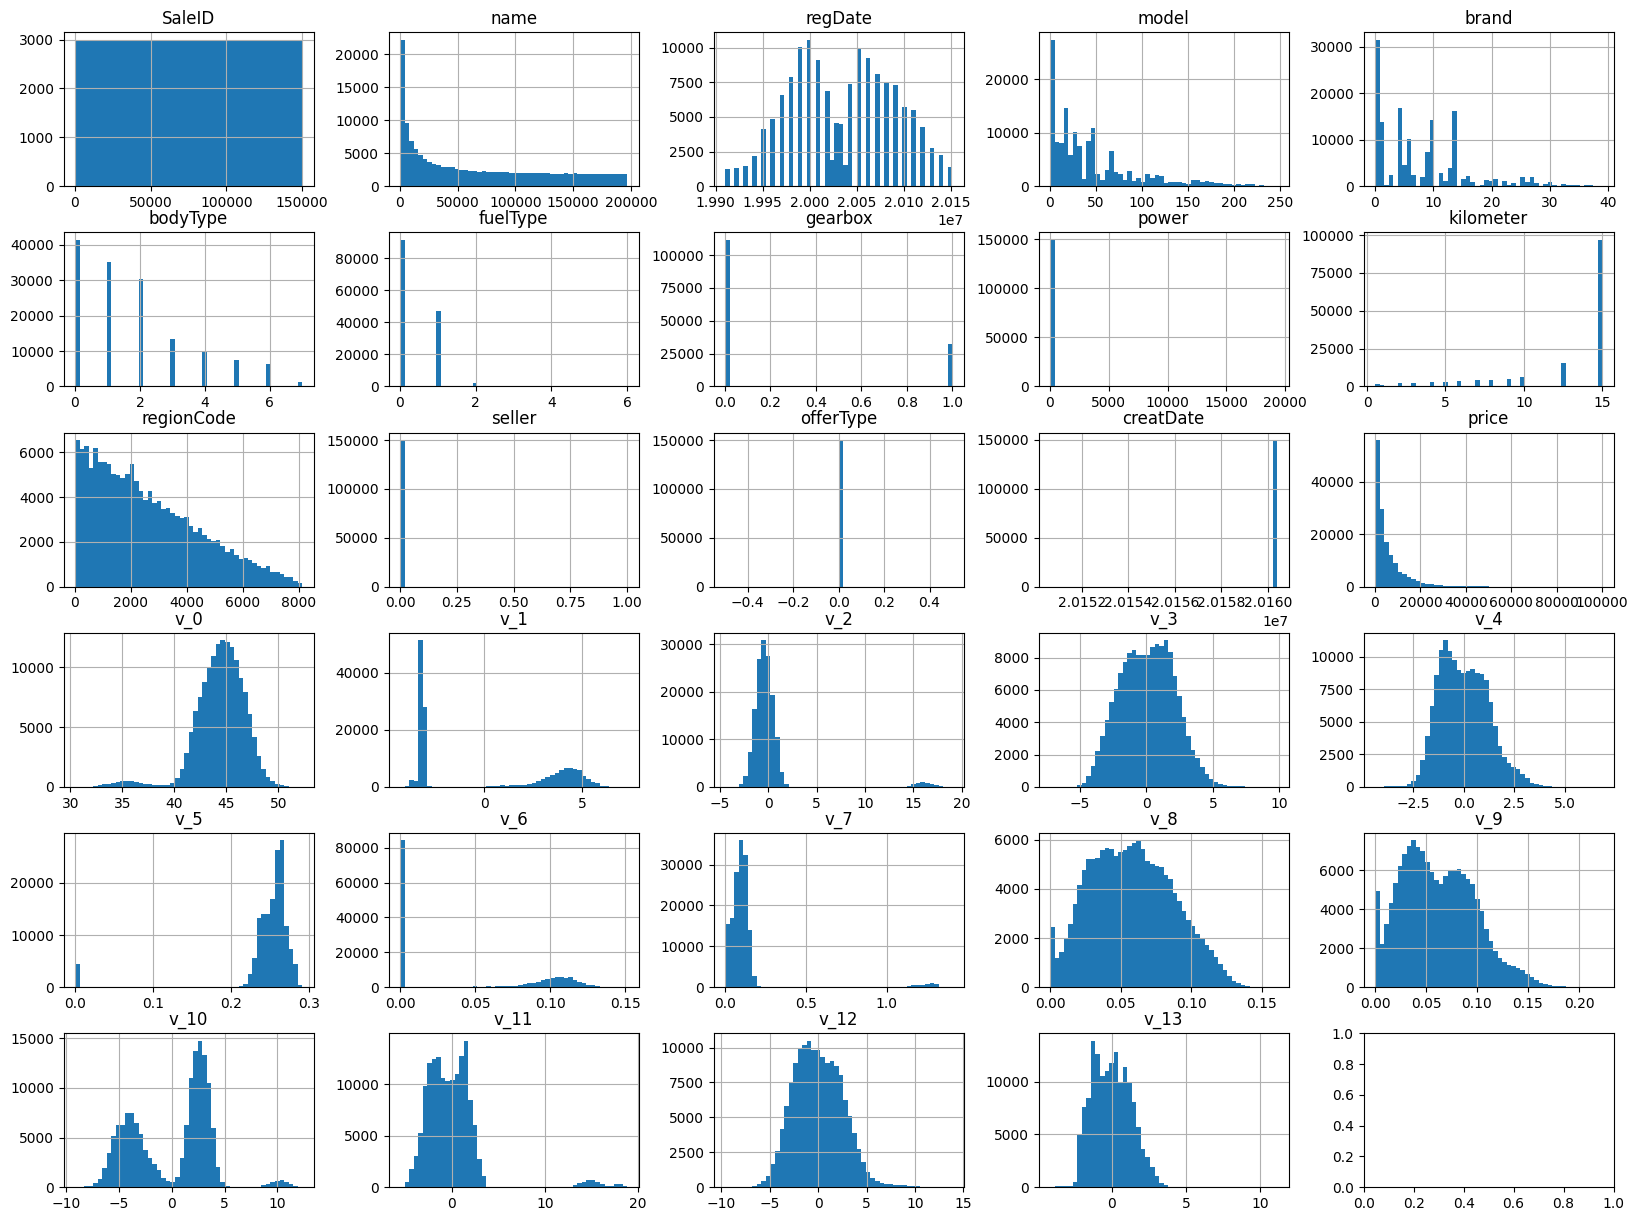

In [5]:
#绘制所有变量的直方图，查看数据
df_train.hist(bins=50,figsize=(20,15))
plt.cla()  #清除axes

In [25]:
import copy
df = copy.deepcopy(df_train)
df = df.drop(columns = ['notRepairedDamage'])
df = df.drop(columns = ['offerType'])
df = df.drop(columns = ['SaleID'])
df = df.drop(columns = ['name'])
# for i in range(15):
#     df = df.drop(columns = ['v_' + str(i)])

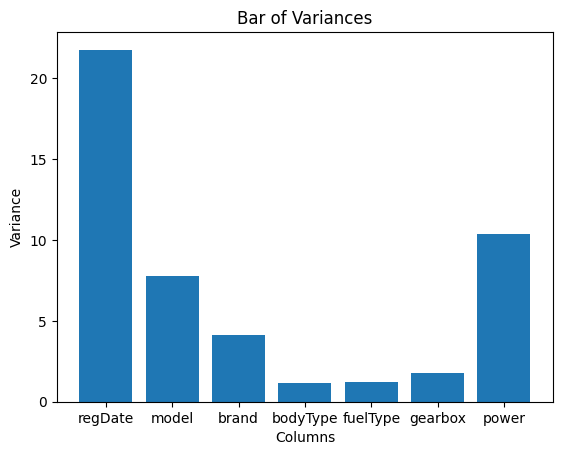

In [26]:
# 计算 DataFrame 中每一列的方差
variances = df.var()
#print(variances)
log_variances = variances.apply(np.log)
#print(log_variances)
# 绘制方差的柱状图
plt.bar(log_variances.index[:7], np.abs(log_variances.values[:7]))
plt.xlabel('Columns')
plt.ylabel('Variance')
plt.title('Bar of Variances')
plt.show()



Text(0.5, 1.0, 'Bar of Variances')

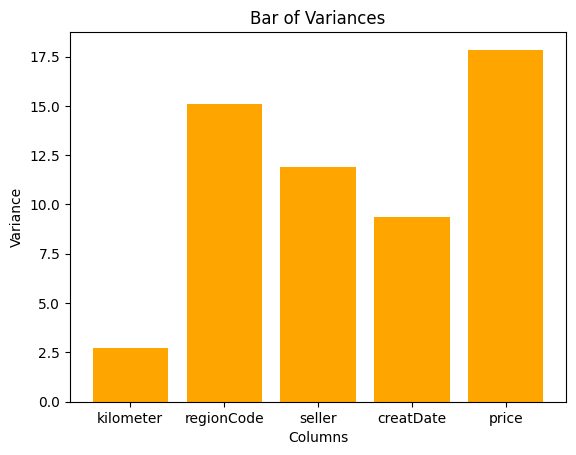

In [31]:
plt.bar(log_variances.index[7:12], np.abs(log_variances.values[7:12]), color='orange')
plt.xlabel('Columns')
plt.ylabel('Variance')
plt.title('Bar of Variances')

Text(0.5, 1.0, 'Bar of Variances')

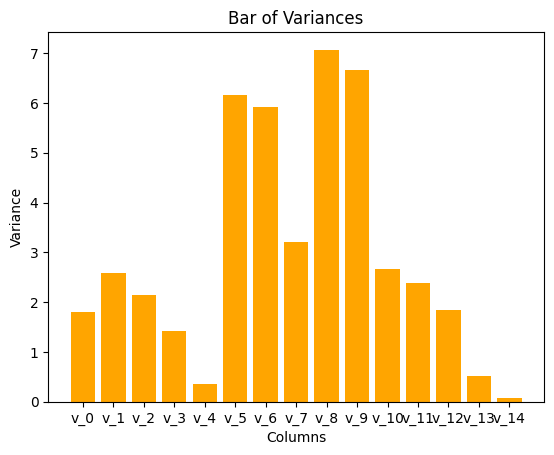

In [33]:
plt.bar(log_variances.index[12:], np.abs(log_variances.values[12:]), color='orange')
plt.xlabel('Columns')
plt.ylabel('Variance')
plt.title('Bar of Variances')

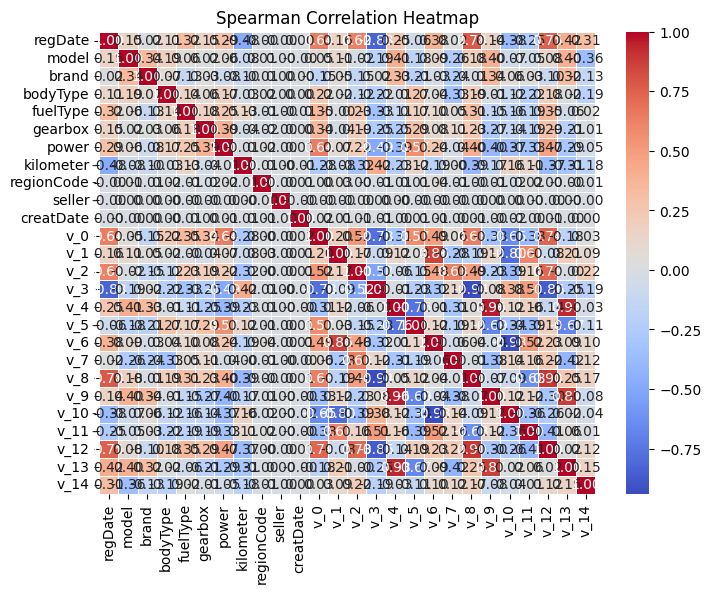

In [34]:
# 计算Spearman相关系数
df_corr = copy.deepcopy(df)
df_corr = df_corr.drop(columns='price')
corr = df_corr.corr(method='spearman')

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


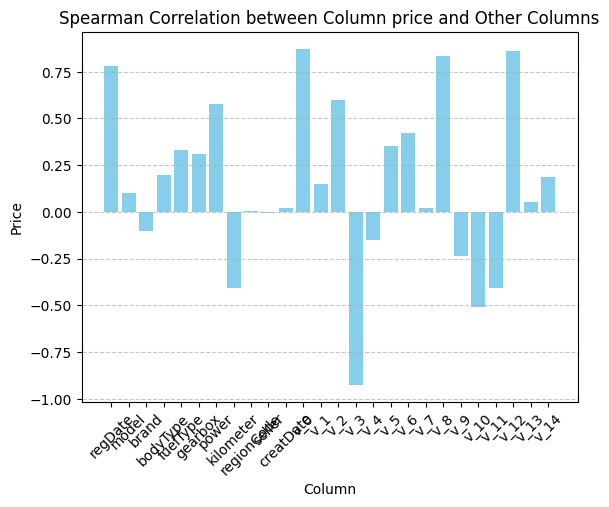

In [35]:
# 选择要计算相关系数的列
column_name = 'price'

# 计算指定列与其他列之间的 Spearman 相关系数
spearman_corr = df.corrwith(df[column_name], method='spearman').drop(column_name)

# 绘制条形图
plt.bar(spearman_corr.index, spearman_corr, color='skyblue')
plt.xlabel('Column')
plt.ylabel('Price')
plt.title(f'Spearman Correlation between Column {column_name} and Other Columns')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [36]:
from sklearn.feature_selection import mutual_info_classif

if df.isna().any().any():
    # 将 NaN 值替换为 0
    df.fillna(0, inplace=True)
if df_corr.isna().any().any():
    df_corr.fillna(0, inplace=True)
others = df_corr
mi = mutual_info_classif(others, df['price'])
print(mi)  # 输出互信息量

[5.56683288e-01 2.31384205e-01 1.25433491e-01 1.09397737e-01
 1.04196006e-01 8.66194699e-02 3.71253815e-01 1.82335207e-01
 9.57644511e-02 6.53595321e-04 1.13925993e-02 8.86020930e-01
 1.84806781e-01 4.06294148e-01 1.09163643e+00 1.16043435e-01
 1.80171101e-01 5.35134221e-01 9.59707074e-02 7.32439021e-01
 1.18954721e-01 1.01533054e+00 7.06802678e-01 1.23854932e+00
 2.22398377e-01 2.21377516e-01]


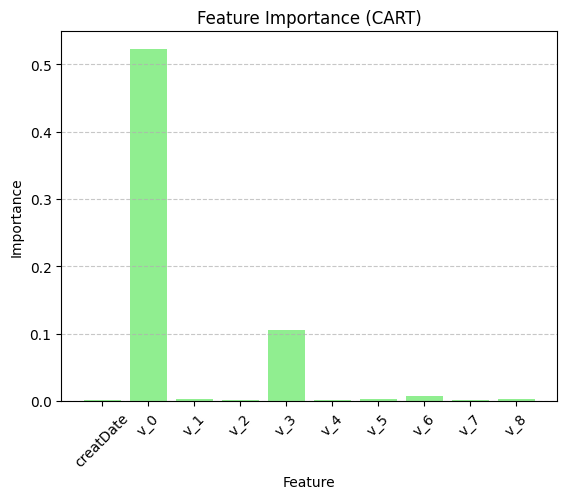

In [43]:
from sklearn.tree import DecisionTreeRegressor

X = df_corr
y = df['price']

# 训练决策树模型
model = DecisionTreeRegressor()
model.fit(X, y)

# 提取特征重要性
importance = model.feature_importances_

# 可视化特征重要性
plt.bar(X.columns[10:20], importance[10:20], color='lightgreen')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (CART)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [39]:
from sklearn.decomposition import PCA
print(df_corr)
# 准备数据
X = copy.deepcopy(df_corr)

# X = X.drop(columns='creatDate')
# X = X.drop(columns='regionCode')
# X = X.drop(columns='model')
# print(X)
X = X.values

# 初始化 PCA 模型
pca = PCA()

# 拟合 PCA 模型
pca.fit(X)

# 获取主成分的特征值
eigenvalues = pca.explained_variance_

# 绘制碎石图
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid(True)
plt.show()


         regDate  model  brand  bodyType  fuelType  gearbox  power  kilometer  \
0       20040402   30.0      6       1.0       0.0      0.0     60       12.5   
1       20030301   40.0      1       2.0       0.0      0.0      0       15.0   
2       20040403  115.0     15       1.0       0.0      0.0    163       12.5   
3       19960908  109.0     10       0.0       0.0      1.0    193       15.0   
4       20120103  110.0      5       1.0       0.0      0.0     68        5.0   
...          ...    ...    ...       ...       ...      ...    ...        ...   
149995  20000607  121.0     10       4.0       0.0      1.0    163       15.0   
149996  20091102  116.0     11       0.0       0.0      0.0    125       10.0   
149997  20101003   60.0     11       1.0       1.0      0.0     90        6.0   
149998  20060312   34.0     10       3.0       1.0      0.0    156       15.0   
149999  19990204   19.0     28       6.0       0.0      1.0    193       12.5   

        regionCode  seller 

KeyError: "['price'] not found in axis"

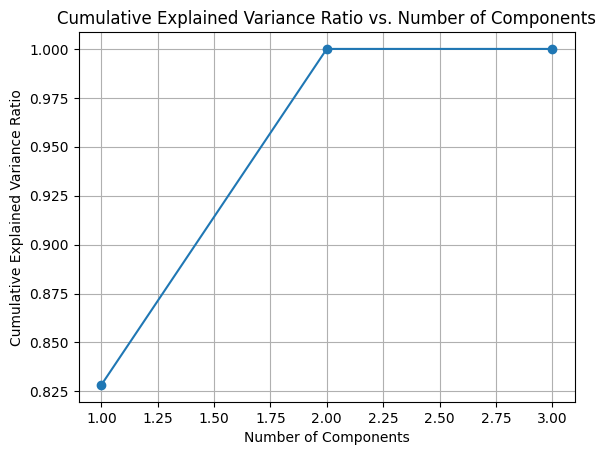

In [24]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 创建示例 DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 1, 5, 4]
}
df = pd.DataFrame(data)

# 准备数据
X = df.values

# 初始化 PCA 模型
pca = PCA()

# 拟合 PCA 模型
pca.fit(X)

# 绘制累积方差贡献率图
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()
